## IMPORT CV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Mengimpor Gambar

In [2]:
image = cv2.imread('nanas.png')

## Konversi Gambar dari format BRG ke RGB

In [3]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

## Mendefinikan Batas Bawah dan Atas Untuk Warna Kuning (Nanas)

In [4]:
lower_yellow = np.array([0, 50, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

## Mendefinikan Batas Bawah dan Atas Untuk Warna Hijau (Daun)

In [5]:
lower_green = np.array([31, 60, 5], dtype="uint8")
upper_green = np.array([150, 255, 255], dtype="uint8")

## Membuat Masker untuk Pixel Kuning dan Hijau

In [6]:
mask_pineapple = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_leaves = cv2.inRange(hsv_image, lower_green, upper_green)

## Melakukan Oprasi Bitwise

In [11]:
segmented_pineapple = cv2.bitwise_and(image, image, mask=mask_pineapple)
segmented_leaves = cv2.bitwise_and(image, image, mask=mask_leaves)

## Melakukan Masker untuk Nanas tanpa Daun

In [8]:
mask_pineapple_no_leaves = cv2.bitwise_not(mask_leaves)
mask_pineapple_no_leaves = cv2.bitwise_and(mask_pineapple, mask_pineapple_no_leaves)

## Menampilkan Output gambar asli, masker nanas tanpa daun, segmentasi nanas, dan segmentasi daun

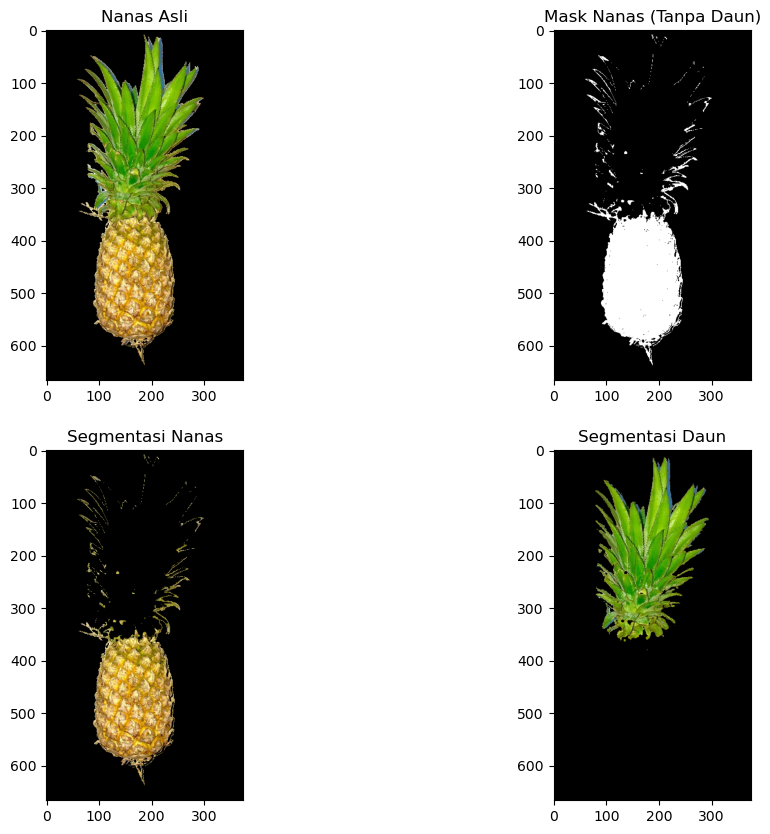

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Nanas Asli')

axs[0, 1].imshow(mask_pineapple_no_leaves, cmap='gray')
axs[0, 1].set_title('Mask Nanas (Tanpa Daun)')

axs[1, 0].imshow(cv2.cvtColor(segmented_pineapple, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Segmentasi Nanas')

axs[1, 1].imshow(cv2.cvtColor(segmented_leaves, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Segmentasi Daun')

plt.show()